# US Census exercise

http://thomasdata.s3.amazonaws.com/ds/us_census_full.zip
* This US Census dataset contains detailed but anonymized information for approximately 300,000 people.

* The goal of this exercise is to model the information contained in the last column (42nd), i.e., whether a person makes more or less than 50,000 per year, from the information contained in the other columns. The exercise here consists of modeling a binary variable.

* Work with Python (or R) to carry out the following steps:
* 1) Load the train and test files.
* 2) Perform an exploratory analysis on the data and create some relevant visualisations.
* 3) Clean, preprocess, and engineer features in the training data, with the aim of building a data set that a model will perform well on.
* 4) Create a model using these features to predict whether a person earns more or less than 50,000 per year. Here, the idea is for you to test a few different models, and see whether there are any techniques you can apply to improve performance over your first results.
* 5) Choose the model that appears to have the highest performance based on a comparison between reality (the 42nd variable) and the model’s prediction. 
* 6) Apply your model to the test file and measure its real performance on it (same method as above).

* The goal of this exercise is not to create the best or the purest model, but rather to describe the steps you took to accomplish it.
* Explain areas that may have been the most challenging for you.
* Find clear insights on the profiles of the people that make more than 50,000 / year. For example, which variables seem to be the most correlated with this phenomenon?

* Once again, the goal of this exercise is not to solve this problem, but rather to spend a few hours on it and to thoroughly explain your approach.

In [52]:
import sys 
import pandas as pd
import matplotlib
import numpy as np
import IPython
from IPython import display
import sklearn 
import random
import time
import warnings
#warnings.filterwarnings('ignore')

import qgrid
import _pickle as cPickle
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import scipy
from sklearn.utils import shuffle

# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

from xgboost import plot_importance

# Read datasets

In [53]:
#read the 2 datasets

# The datasets don't have column names, so I just copied the names from the metadata file
names = ["age", "class of worker", "detailed industry recode", "detailed occupation recode", "education", "wage per hour", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "capital gains", "capital losses", "dividends from stocks", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household, instance weight", "instance weight", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "num persons worked for employer", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "own business or self employed", "fill inc questionnaire for veterans admin", "veterans benefits", "weeks worked in year", "year", "income"]

train_cinc = pd.read_csv("census_income_learn.csv", names = names, sep=',', encoding = "ISO-8859-1", index_col = False)
test_cinc = pd.read_csv("census_income_test.csv", names = names, sep=',', encoding = "ISO-8859-1", index_col = False) 


## Some informations about the data:

In [54]:
print(train_cinc.info())
print("_"* 30)
print(test_cinc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   age                                                       199523 non-null  int64  
 1   class of worker                                           199523 non-null  object 
 2   detailed industry recode                                  199523 non-null  int64  
 3   detailed occupation recode                                199523 non-null  int64  
 4   education                                                 199523 non-null  object 
 5   wage per hour                                             199523 non-null  int64  
 6   enroll in edu inst last wk                                199523 non-null  object 
 7   marital stat                                              199523 non-null  object 
 8   majo

In [55]:
train_cinc.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [56]:
test_cinc.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [57]:
train_cinc['income'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: income, dtype: int64

In [58]:
test_cinc['income'].value_counts()

 - 50000.    93576
 50000+.      6186
Name: income, dtype: int64

### Unique values

In [59]:
for col in train_cinc.columns: 
    print(col + ": ", '(len:'+str(len(train_cinc[col].unique()))+')', train_cinc[col].unique())
    print('-'*30)
    
print('_'*30)
print('_'*30)

for col in test_cinc.columns: 
    print(col + ": ", '(len:'+str(len(test_cinc[col].unique()))+')', test_cinc[col].unique())
    print('-'*30)

age:  (len:91) [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
------------------------------
class of worker:  (len:9) [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
------------------------------
detailed industry recode:  (len:52) [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
------------------------------
detailed occupation recode:  (len:47) [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
-------------------

migration prev res in sunbelt:  (len:4) [' ?' ' Yes' ' Not in universe' ' No']
------------------------------
num persons worked for employer:  (len:7) [0 1 6 4 5 3 2]
------------------------------
family members under 18:  (len:5) [' Not in universe' ' Both parents present' ' Mother only present'
 ' Neither parent present' ' Father only present']
------------------------------
country of birth father:  (len:43) [' United-States' ' Vietnam' ' Philippines' ' ?' ' Columbia' ' Germany'
 ' Mexico' ' Japan' ' Peru' ' Dominican-Republic' ' South Korea' ' Cuba'
 ' El-Salvador' ' Canada' ' Scotland' ' Outlying-U S (Guam USVI etc)'
 ' Italy' ' Guatemala' ' Ecuador' ' Puerto-Rico' ' Cambodia' ' China'
 ' Poland' ' Nicaragua' ' Taiwan' ' England' ' Ireland' ' Hungary'
 ' Yugoslavia' ' Trinadad&Tobago' ' Jamaica' ' Honduras' ' Portugal'
 ' Iran' ' France' ' India' ' Hong Kong' ' Haiti' ' Greece'
 ' Holand-Netherlands' ' Thailand' ' Laos' ' Panama']
------------------------------
country of birth 

state of previous residence:  (len:51) [' Not in universe' ' North Carolina' ' Kentucky' ' Nevada' ' Arkansas'
 ' Nebraska' ' North Dakota' ' Arizona' ' Abroad' ' Florida' ' Montana'
 ' Tennessee' ' Maine' ' Minnesota' ' New Mexico' ' Massachusetts'
 ' Louisiana' ' Utah' ' Michigan' ' ?' ' Iowa' ' New Hampshire' ' Alabama'
 ' Oklahoma' ' California' ' Illinois' ' Connecticut' ' Alaska'
 ' Pennsylvania' ' Colorado' ' Oregon' ' Maryland' ' New Jersey'
 ' Vermont' ' Ohio' ' South Dakota' ' Mississippi' ' Indiana' ' Missouri'
 ' Kansas' ' South Carolina' ' Georgia' ' District of Columbia'
 ' West Virginia' ' Wyoming' ' New York' ' Delaware' ' Wisconsin' ' Texas'
 ' Virginia' ' Idaho']
------------------------------
detailed household and family stat:  (len:37) [' Spouse of householder' ' Child <18 never marr not in subfamily'
 ' Householder' ' Secondary individual'
 ' Child 18+ never marr Not in a subfamily' ' Nonfamily householder'
 ' Grandchild 18+ never marr not in subfamily'
 ' Other R

## Transforming some data
* The '?' will be treated as null.

### Analysing ? as null

In [60]:
for col in train_cinc.columns:
    if len(train_cinc[train_cinc[col] == ' ?']) > 0:
        print(col)
        print(train_cinc[train_cinc[col] == ' ?'].shape[0])
        print("-")

state of previous residence
708
-
migration code-change in msa
99696
-
migration code-change in reg
99696
-
migration code-move within reg
99696
-
migration prev res in sunbelt
99696
-
country of birth father
6713
-
country of birth mother
6119
-
country of birth self
3393
-


* test data

In [61]:
for col in test_cinc.columns:
    if len(test_cinc[test_cinc[col] == ' ?']) > 0:
        print(col)
        print(test_cinc[test_cinc[col] == ' ?'].shape[0])
        print("-")

state of previous residence
330
-
migration code-change in msa
49946
-
migration code-change in reg
49946
-
migration code-move within reg
49946
-
migration prev res in sunbelt
49946
-
country of birth father
3429
-
country of birth mother
3072
-
country of birth self
1764
-


* Transforming

In [62]:
train_cinc = train_cinc.replace([" ?"], [None])

test_cinc = test_cinc.replace([" ?"], [None])

* Drop duplicates

In [63]:
train_cinc = train_cinc.drop_duplicates(keep = 'first')

# Cleaning data

## Current null values

In [64]:
print("train_cinc total: ", len(train_cinc))
print('train_cinc total by feature:\n', train_cinc.isnull().sum())
print("-"*30)

print("test_cinc total: ", len(test_cinc))
print('test_cinc total by feature:\n', test_cinc.isnull().sum())

train_cinc total:  196294
train_cinc total by feature:
 age                                                             0
class of worker                                                 0
detailed industry recode                                        0
detailed occupation recode                                      0
education                                                       0
wage per hour                                                   0
enroll in edu inst last wk                                      0
marital stat                                                    0
major industry code                                             0
major occupation code                                           0
race                                                            0
hispanic origin                                                 0
sex                                                             0
member of a labor union                                         0
reason for unemploym

## Decisions to make with the null values

* The exploratory analysis (next section) helped to decide what to do with the null values of each feature.

* I deleted ["migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "migration prev res in sunbelt"] features because they contain 50% of the null lines.

* I deleted the remaining lines with null values.


In [65]:
drop_column = ["migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "migration prev res in sunbelt"]
train_cinc.drop(drop_column, axis = 1, inplace = True)
test_cinc.drop(drop_column, axis = 1, inplace = True)

drop_lines = ['state of previous residence', 'country of birth father', 'country of birth mother', "country of birth self"]
train_cinc.dropna(subset=drop_lines, inplace = True)
test_cinc.dropna(subset=drop_lines, inplace = True)

print("train_cinc total: ", len(train_cinc))
print('train_cinc total by feature:\n', train_cinc.isnull().sum())
print("-"*30)

print("test_cinc total: ", len(test_cinc))
print('test_cinc total by feature:\n', test_cinc.isnull().sum())

train_cinc total:  187346
train_cinc total by feature:
 age                                                         0
class of worker                                             0
detailed industry recode                                    0
detailed occupation recode                                  0
education                                                   0
wage per hour                                               0
enroll in edu inst last wk                                  0
marital stat                                                0
major industry code                                         0
major occupation code                                       0
race                                                        0
hispanic origin                                             0
sex                                                         0
member of a labor union                                     0
reason for unemployment                                     0
full or part t

# Feature engineering

* I engineering some features.

In [66]:
#United States Average Weekly Hours = 33 https://web.archive.org/web/20141210211636/http://www.bsu.edu/ibb/us/emp/emp2.htm
train_cinc["wage_for_33_hours_per_week"]= train_cinc["wage per hour"] * 33 * train_cinc["weeks worked in year"]

train_cinc["capital_profit"]= train_cinc["capital gains"] - train_cinc["capital losses"]


test_cinc["wage_for_33_hours_per_week"]= test_cinc["wage per hour"] * 33 * test_cinc["weeks worked in year"]

test_cinc["capital_profit"]= test_cinc["capital gains"] - test_cinc["capital losses"]

# Exploratory Analysis

* Some histograms of the data:

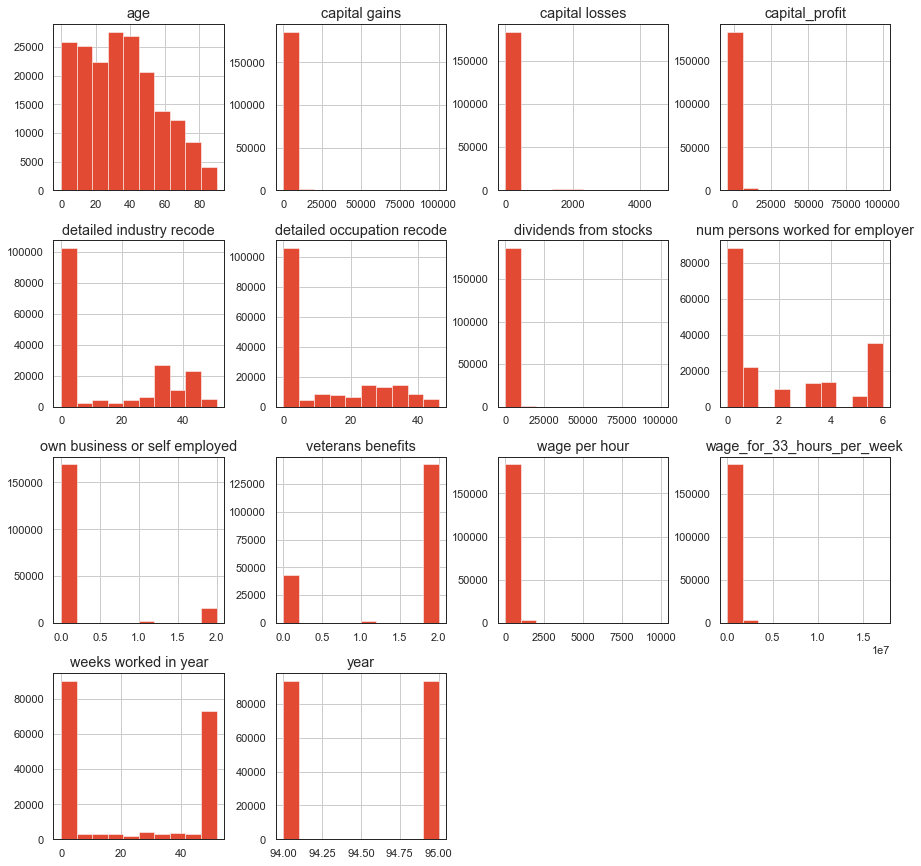

In [67]:
num_attributes = train_cinc.select_dtypes(include=['int64'])
cat_attributes = train_cinc.select_dtypes(include=['object'])
num_attributes.hist(figsize=(15,15))
plt.show()

## Not in universe 

* Just to have an idea about the number of cases that a feature don't make sense.

In [68]:
for col in train_cinc.columns:
    if len(train_cinc[train_cinc[col] == ' Not in universe']) > 0:
        print(col)
        print(train_cinc[train_cinc[col] == ' Not in universe'].shape[0])
        print("-")

class of worker
92110
-
enroll in edu inst last wk
175316
-
major occupation code
92520
-
member of a labor union
168992
-
reason for unemployment
181561
-
region of previous residence
172879
-
state of previous residence
172879
-
family members under 18
136925
-
fill inc questionnaire for veterans admin
185454
-


In [69]:
train_cinc.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,wage_for_33_hours_per_week,capital_profit
count,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,187346.000000,1.873460e+05,187346.000000
mean,34.545659,15.655514,11.595065,56.927065,430.562745,37.538912,194.692873,1744.863624,2.001041,0.180463,1.532234,23.680506,94.500443,8.815780e+04,393.023833
std,21.999332,18.109131,14.539640,277.053744,4650.465792,272.117170,1978.593843,1000.189105,2.374438,0.560859,0.840614,24.433682,0.500001,4.475861e+05,4661.888643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000e+00,-4608.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.680000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000e+00,0.000000
50%,33.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1620.470000,1.000000,0.000000,2.000000,12.000000,95.000000,0.000000e+00,0.000000
75%,49.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2200.577500,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000e+00,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.715828e+07,99999.000000


## Age

The maximum age is 90
The minimum age is 0


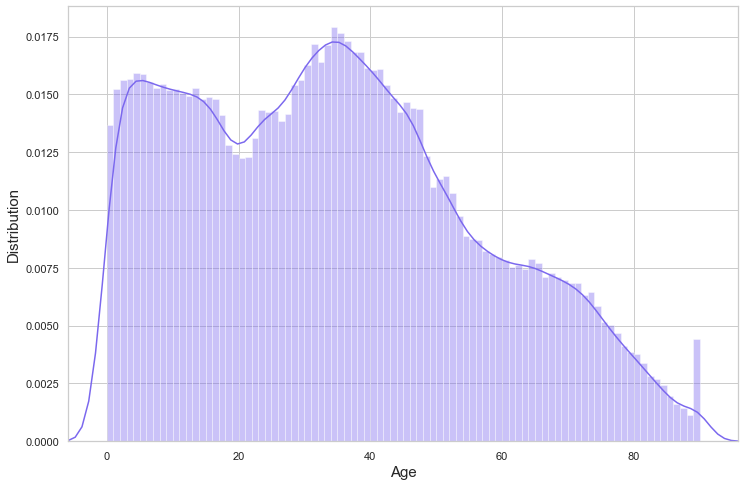

In [70]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(train_cinc['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", train_cinc['age'].max())
print ("The minimum age is", train_cinc['age'].min())

## Education

* As it can be seen, the education is related with the income. For example, the income increases when the people have a bachelor, master or a PhD. 

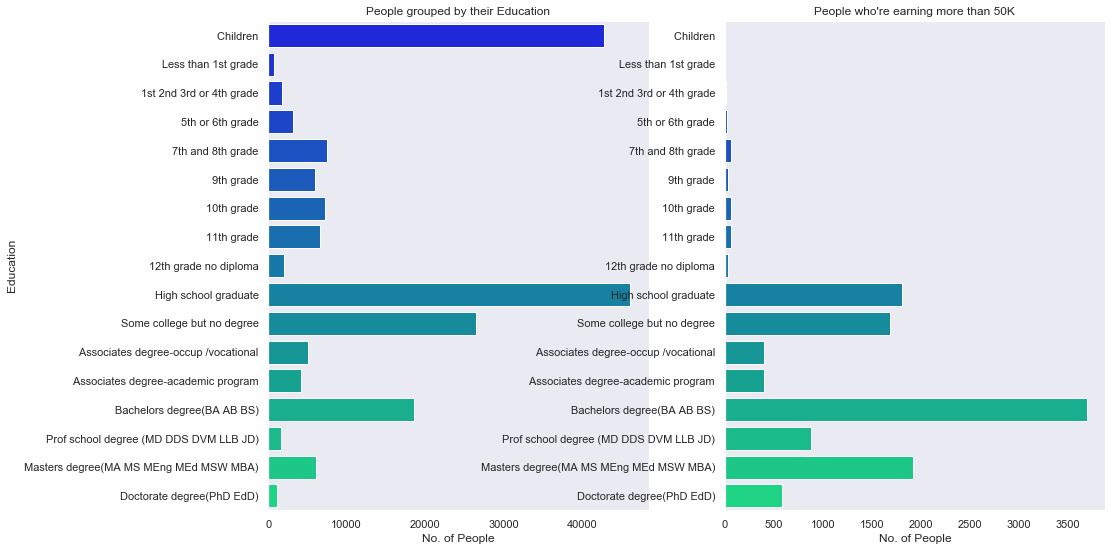

In [73]:
# Grouping people by their education
education_size = train_cinc.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = train_cinc.loc[train_cinc['income'] == ' 50000+.', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = [' Children', ' Less than 1st grade', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade',' 9th grade',' 10th grade', ' 11th grade', ' 12th grade no diploma', ' High school graduate', ' Some college but no degree', ' Associates degree-occup /vocational',' Associates degree-academic program', ' Bachelors degree(BA AB BS)',' Prof school degree (MD DDS DVM LLB JD)',' Masters degree(MA MS MEng MEd MSW MBA)', ' Doctorate degree(PhD EdD)'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = [' Children', ' Less than 1st grade', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade',' 9th grade',' 10th grade', ' 11th grade', ' 12th grade no diploma', ' High school graduate', ' Some college but no degree', ' Associates degree-occup /vocational',' Associates degree-academic program', ' Bachelors degree(BA AB BS)',' Prof school degree (MD DDS DVM LLB JD)',' Masters degree(MA MS MEng MEd MSW MBA)', ' Doctorate degree(PhD EdD)'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

* Education vs income

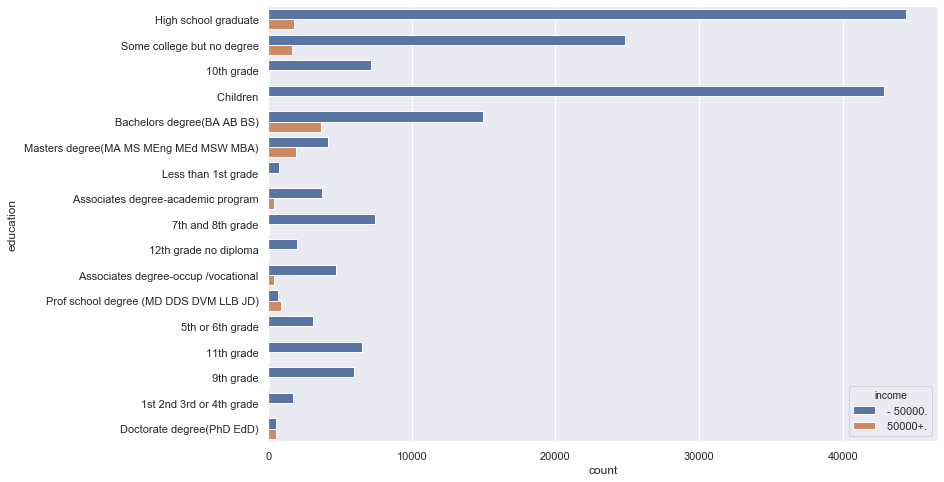

In [72]:
sns.countplot(y='education', hue='income', data = cat_attributes)

* Education vs income

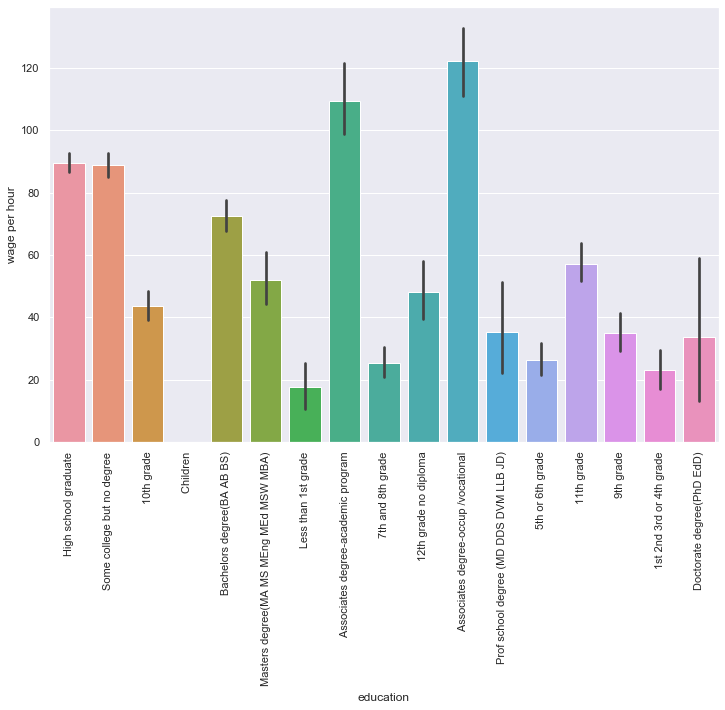

In [71]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = train_cinc['education'], y = train_cinc['wage per hour'], data = train_cinc)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

## Sex

* Sex is related to the income, as it can be seen:

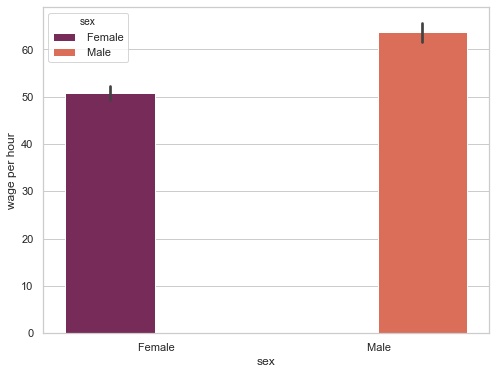

In [75]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = train_cinc['sex'], y = train_cinc['wage per hour'], data = train_cinc, hue = 'sex', palette="rocket") #estimator = np.median, 

## Class of worker

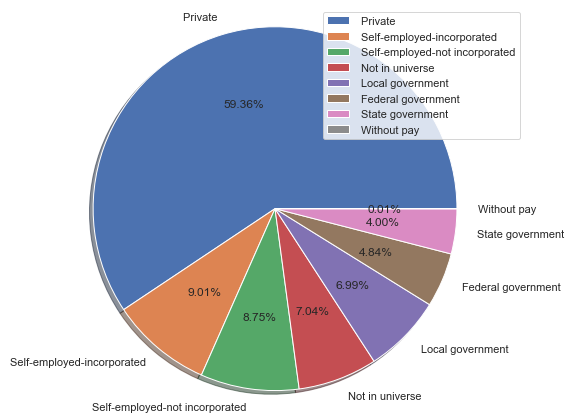

In [76]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = train_cinc.loc[train_cinc['income'] == ' 50000+.',['class of worker']]
workclass_types = df_['class of worker'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

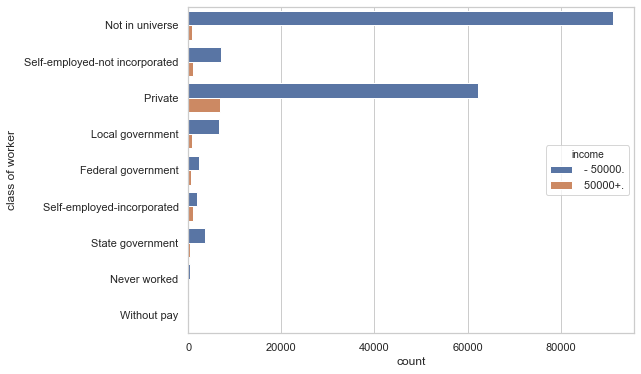

In [77]:
sns.countplot(y='class of worker', hue='income', data = train_cinc)

## Country of birth

* Analysing the countries of birth with better and lower income.

In [78]:
# Grouping people according to their country and their income
native_more = train_cinc.loc[train_cinc['income'] == ' 50000+.',['country of birth self']].groupby('country of birth self').size()
native_less = train_cinc.loc[train_cinc['income'] == ' - 50000.',['country of birth self']].groupby('country of birth self').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

[' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary', ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand', ' United-States', ' Vietnam', ' Yugoslavia']
40
[' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary', ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama', ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' Sou

* Countries with lower income:

In [79]:
[country for country in index_less if country not in index_more]

[' Panama', ' Trinadad&Tobago']

In [80]:

df_more = pd.DataFrame({'Countries' : index_more, ' 50000+.' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, ' - 50000.' : list(native_less) })

df_more.loc[40] = ' Panama', 0
df_more.loc[41] = ' Trinadad&Tobago', 0

df_more

,Countries,50000+.
0,Cambodia,1
1,Canada,63
2,China,33
3,Columbia,9
4,Cuba,55
5,Dominican-Republic,10
6,Ecuador,8
7,El-Salvador,12
8,England,50
9,France,14


In [81]:
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,- 50000.,50000+.
0,Cambodia,93,1
1,Canada,575,63
2,China,435,33
3,Columbia,420,9
4,Cuba,697,55
5,Dominican-Republic,671,10
6,Ecuador,249,8
7,El-Salvador,665,12
8,England,364,50
9,France,92,14


* Analysing the income of the country of birth (without US, because it was disproportionate).

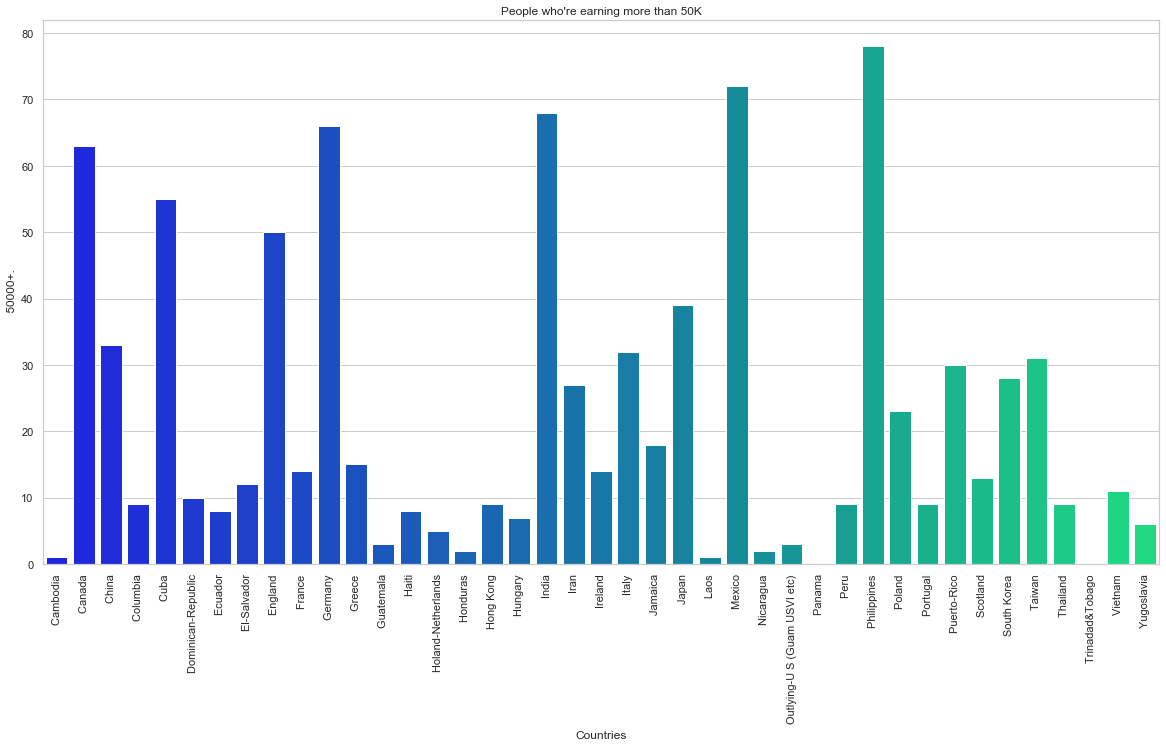

In [82]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity between US and other Countries
df_fin = df_fin.drop([39])

sns_ = sns.barplot(x = df_fin['Countries'], y = df_fin[' 50000+.'], data = df_fin, palette = 'winter')
sns_.title.set_text("People who're earning more than 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);

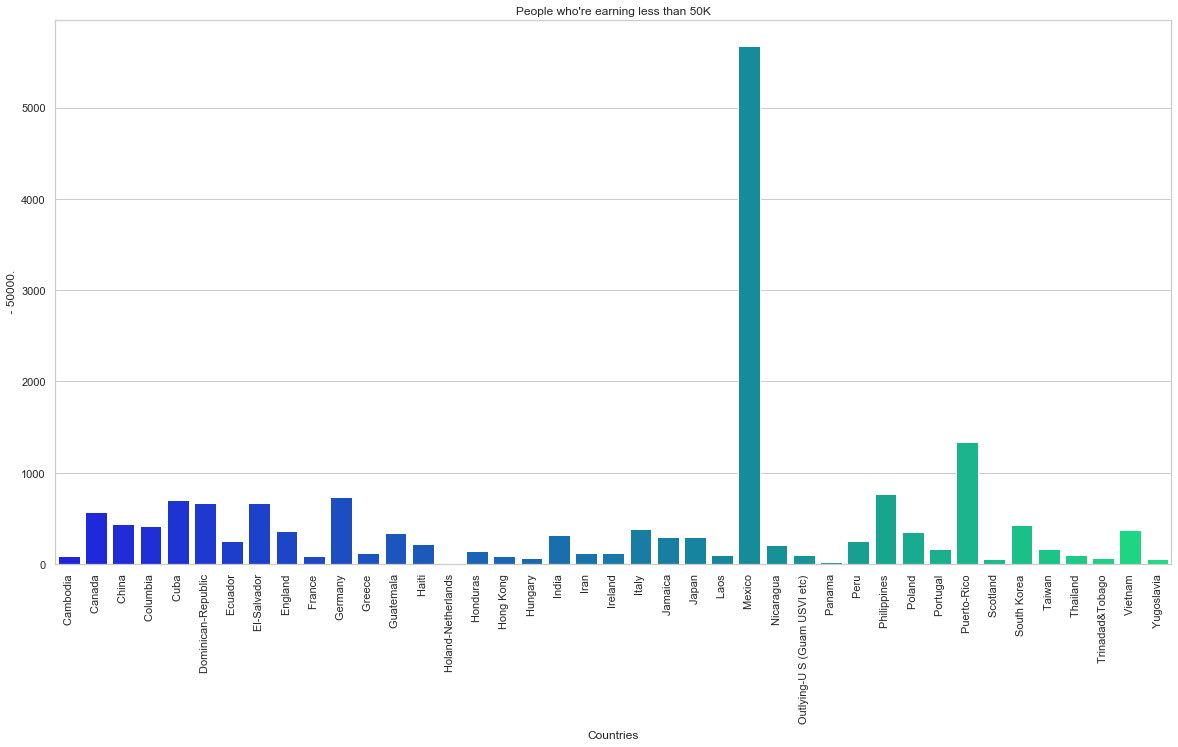

In [83]:

sns__ = sns.barplot(x = df_fin['Countries'], y = df_fin[' - 50000.'], data = df_fin, palette = 'winter')
sns__.title.set_text("People who're earning less than 50K")

plt.setp(sns__.get_xticklabels(), rotation = 90);

* The nationality is very related to the income. For example, Mexican people are related to lower income. However, it can also be true because of other features related to Mexico (education etc).

## Race

* Here, we can see that some races are less related to better income (for example, it can be seen a difference in black race between the 2 charts).

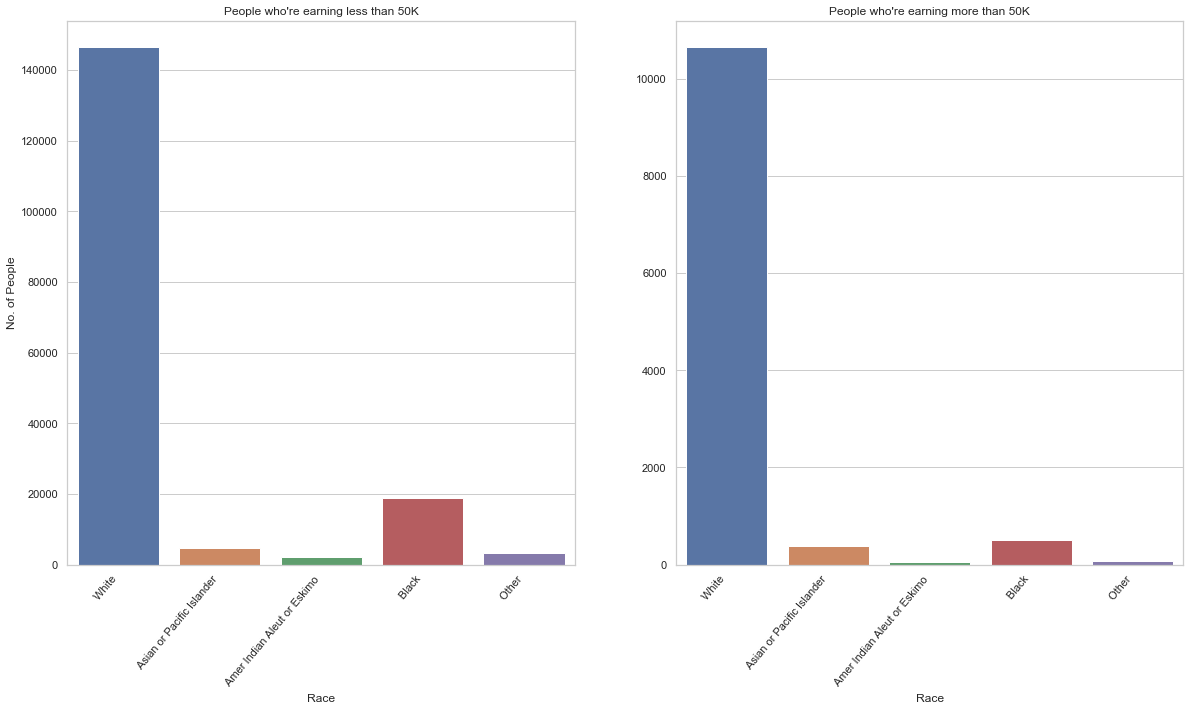

In [84]:
# Setting axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

race_less = train_cinc.loc[train_cinc['income'] == ' - 50000.'].groupby('race').size()
race_more = train_cinc.loc[train_cinc['income'] == ' 50000+.'].groupby('race').size()

sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = [' White', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Black', ' Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = [' White', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Black', ' Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 50, ha='right');
plt.setp(sns_race_2.get_xticklabels(), rotation = 50, ha='right');

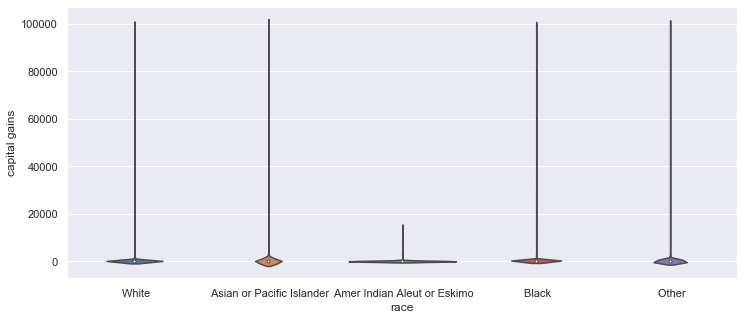

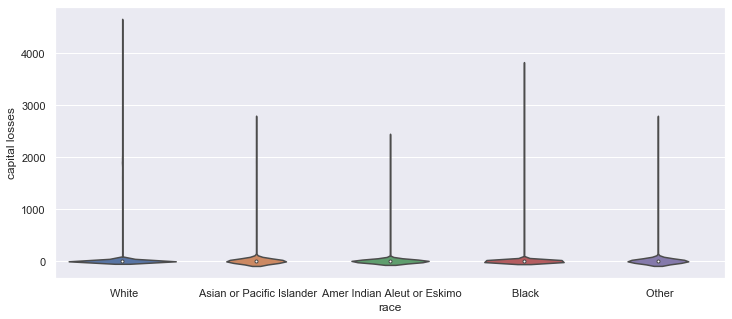

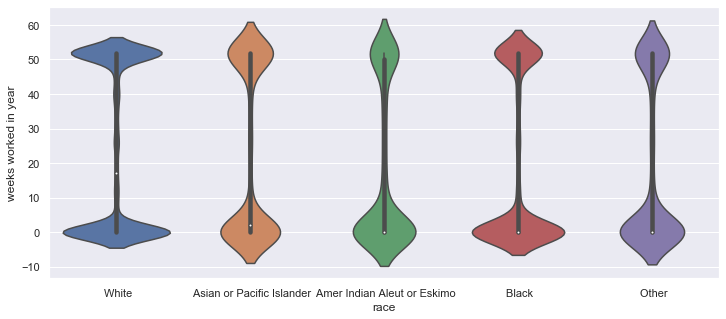

In [85]:
# Setting Parameters
sns.set(style = 'darkgrid')
sns.set(rc={'figure.figsize':(12,5)})

sns.violinplot(x = train_cinc['race'], y = train_cinc['capital gains'], data = train_cinc);
plt.show()
sns.violinplot(x = train_cinc['race'], y = train_cinc['capital losses'], data = train_cinc);
plt.show()
sns.violinplot(x = train_cinc['race'], y = train_cinc['weeks worked in year'], data = train_cinc);
plt.show()

## Marital stat

* Marital stat is related to the income. For example, "Never married" is very related to a lower income but it could be because younger people haven't married yet.

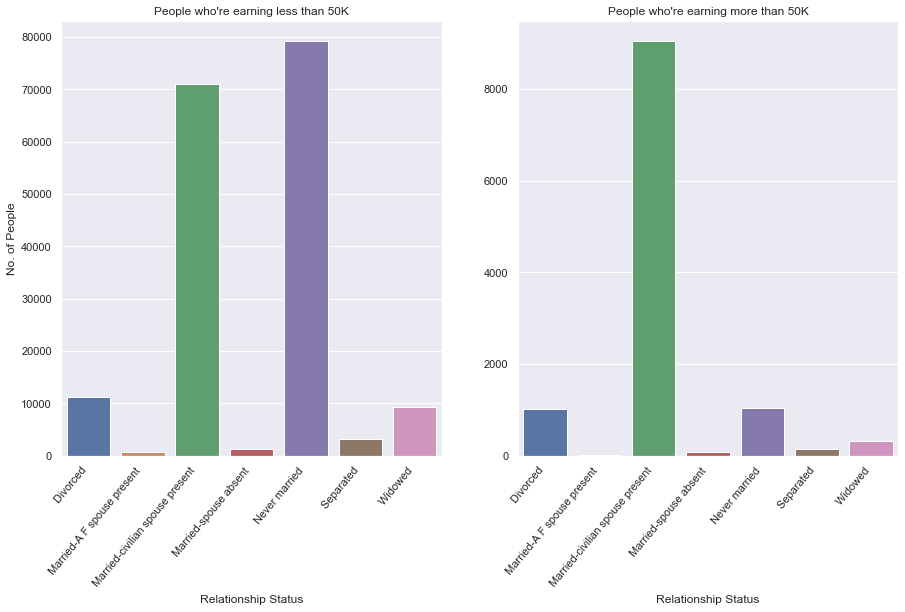

In [86]:
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

rel_less = train_cinc.loc[train_cinc['income'] == ' - 50000.',['marital stat']].groupby('marital stat').size()
rel_more = train_cinc.loc[train_cinc['income'] == ' 50000+.',['marital stat']].groupby('marital stat').size()

sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 50, ha='right');
plt.setp(sns_rel_2.get_xticklabels(), rotation = 50, ha='right');

In [87]:
train_cinc = train_cinc.copy()

train_cinc = train_cinc.reset_index(drop = True)
train_cinc.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income,wage_for_33_hours_per_week,capital_profit
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.,0,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.,0,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.,0,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,0,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,0,0


## Pearson correlation

* There are several correlations and probably the feature selection methods will unselect some of these ones.

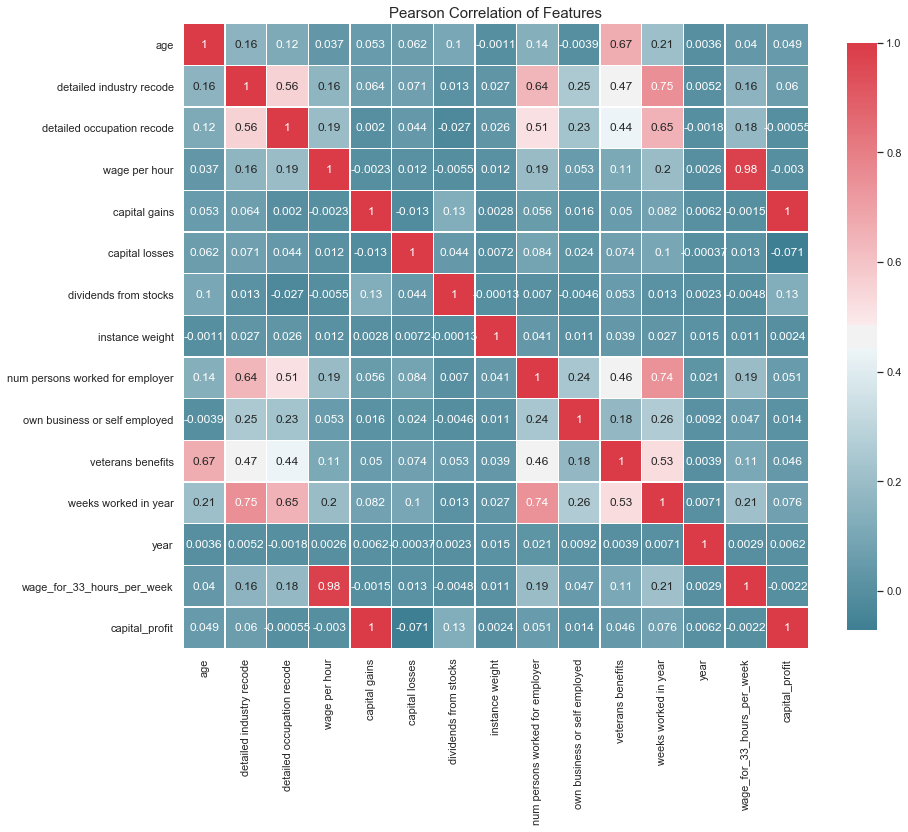

In [88]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

    
    
correlation_heatmap(train_cinc)

# Machine Learning


## Encoding

* I didn't apply one hot encoding to any feature because of the longer training time (which will be long for my pc).

* In the ideal case, several encoding alternatives would be tested.

In [89]:
#train_cinc['income'] = train_cinc['income'].map({' - 50000.':0, ' 50000+.':1})

categorical_features = list(train_cinc.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    train_cinc[feature] = label_encoder_feat[feature].fit_transform(train_cinc[feature]) # train
    test_cinc[feature] = label_encoder_feat[feature].fit_transform(test_cinc[feature]) # test
    
#train_cinc = get_dummies(train_cinc)
train_cinc.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income,wage_for_33_hours_per_week,capital_profit
0,73,3,0,0,12,0,2,6,14,6,...,39,4,0,1,2,0,95,0,0,0
1,58,6,4,34,16,0,2,0,4,8,...,39,4,0,1,2,52,94,0,0,0
2,18,3,0,0,0,0,1,4,14,6,...,40,0,0,1,2,0,95,0,0,0
3,9,3,0,0,10,0,2,4,14,6,...,39,4,0,1,0,0,94,0,0,0
4,10,3,0,0,10,0,2,4,14,6,...,39,4,0,1,0,0,94,0,0,0


In [34]:
#for feature, encoder in label_encoder_feat.items():
#    train_cinc[feature] = encoder.inverse_transform(train_cinc[feature])

In [90]:
train_cinc = shuffle(train_cinc)

In [94]:
train_cinc.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household, instance weight',
       'instance weight', 'live in this house 1 year ago',
       'num persons worked for employer', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'citizenship', 'own business or self employed',
       'fill inc questionnaire for veterans admin', 'veterans benefits',
       'weeks wo

In [97]:
input_columns = ['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household, instance weight',
       'instance weight', 'live in this house 1 year ago',
       'num persons worked for employer', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'citizenship', 'own business or self employed',
       'fill inc questionnaire for veterans admin', 'veterans benefits',
       'weeks worked in year', 'year', 'wage_for_33_hours_per_week',
       'capital_profit']
Target = 'income'

## Target Balance

* I will apply SMOTE algorithm because, as you can see, there are unbalanced classes

* SMOTE algorithm is a good option and better than over sampling, because the overfitting that this last one makes.

AxesSubplot(0.125,0.125;0.775x0.755)


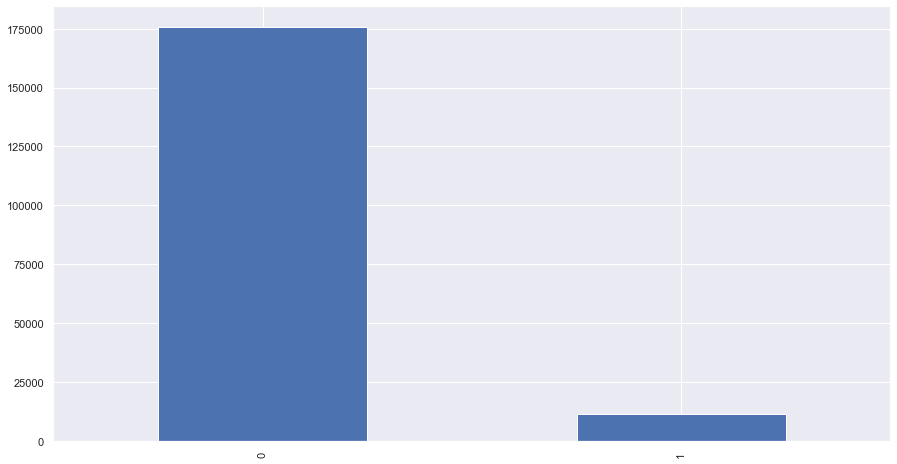

In [95]:
print(train_cinc.income.value_counts().plot(kind='bar'))

### Smote

* As I explained, I have balanced classes.

* Now I have balanced classes and I can apply ML algorithms without bias to one class.

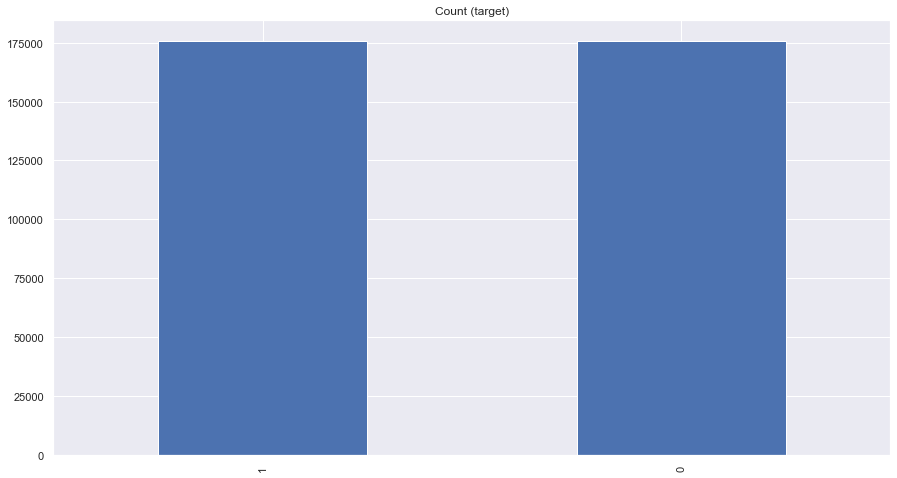

In [99]:
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(train_cinc[input_columns], train_cinc[Target])

target_pd = pd.DataFrame(y_sm, columns = ["income"])
                                          
SMOTE_data = pd.DataFrame(X_sm, columns = input_columns)
SMOTE_data['income'] = target_pd
SMOTE_data.income.value_counts().plot(kind='bar', title='Count (target)')

#data = SMOTE_data # I just have to delete this to have the 2 datas (I already tested the two)

#with open('data_processed.pkl', 'wb') as f:
#        cPickle.dump(data, f)  

## Feature importance

* Plotting the feature importances using the Boosted Gradient Descent.

* The features with higher values are more related to the income.

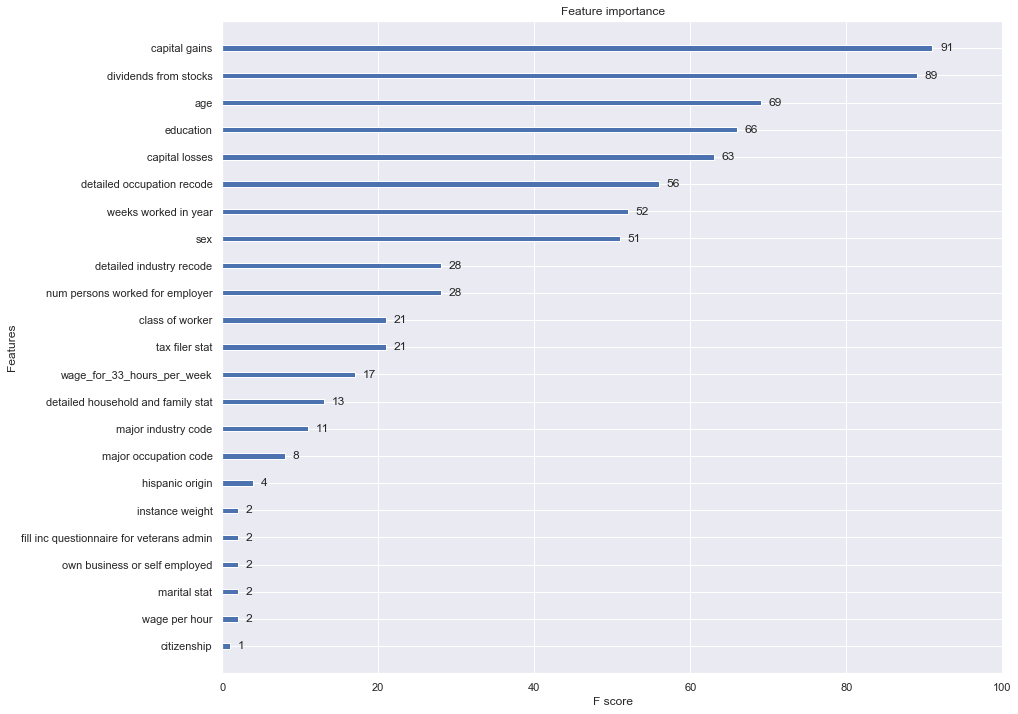

In [100]:
# Training the model
model = XGBClassifier()
model_importance = model.fit(train_cinc[input_columns], train_cinc[Target])

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

## Feature Selection

* Tests with feature selection methods.

### PCA

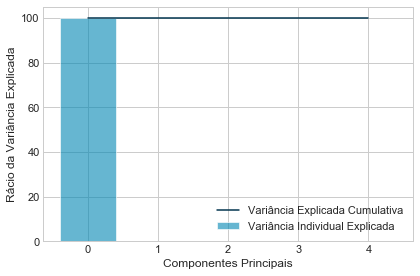

In [101]:
n_features = 5

pca=PCA(n_components=n_features)
X_r=pca.fit(train_cinc).transform(train_cinc)
#print('Variabilidade explicada: %s'% str(pca.explained_variance_ratio_))

values=pca.explained_variance_ratio_
var_exp=[(i)*100 for i in sorted(values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(n_features), var_exp, alpha=0.6, align='center',color='#0086b3', label='Variância Individual Explicada')
    plt.step(range(n_features), cum_var_exp, where='mid', color='#00334d', label='Variância Explicada Cumulativa')
    plt.ylabel('Rácio da Variância Explicada')
    plt.xlabel('Componentes Principais')
    plt.legend(loc='best')
    plt.tight_layout()

### RFE (Recursive Feature Elimination)

In [102]:
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = 0 )
model_to_fselection = ensemble.RandomForestClassifier()

data_rfe = train_cinc.sample(n=50000, random_state=1) # I am sub-sampling, so it will be fast (but less performance)
print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, data_rfe[input_columns], data_rfe[Target], cv  = cv_split2)


#base model
print('BEFORE DT RFE Training Shape Old: ', data_rfe[input_columns].shape) 
print('BEFORE DT RFE Training Columns Old: ', data_rfe[input_columns].columns.values)

#print("BEFORE DT RFE Training score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

print("start fit")
model_to_fselection.fit(data_rfe[input_columns], data_rfe[Target])
print("end fit")

#feature selection
print("rfe_results")
model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, scoring = 'accuracy', cv = cv_split2)
print("start fit")
model_rfe.fit(data_rfe[input_columns], data_rfe[Target])
print("end fit")

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data_rfe[input_columns].columns.values[model_rfe.get_support()]
rfe_results = model_selection.cross_validate(model_to_fselection, data_rfe[X_rfe], data_rfe[Target], cv  = cv_split2)

#print(model_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data_rfe[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

#print("AFTER DT RFE Training score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

base_results
BEFORE DT RFE Training Shape Old:  (50000, 39)
BEFORE DT RFE Training Columns Old:  ['age' 'class of worker' 'detailed industry recode'
 'detailed occupation recode' 'education' 'wage per hour'
 'enroll in edu inst last wk' 'marital stat' 'major industry code'
 'major occupation code' 'race' 'hispanic origin' 'sex'
 'member of a labor union' 'reason for unemployment'
 'full or part time employment stat' 'capital gains' 'capital losses'
 'dividends from stocks' 'tax filer stat' 'region of previous residence'
 'state of previous residence' 'detailed household and family stat'
 'detailed household summary in household, instance weight'
 'instance weight' 'live in this house 1 year ago'
 'num persons worked for employer' 'family members under 18'
 'country of birth father' 'country of birth mother'
 'country of birth self' 'citizenship' 'own business or self employed'
 'fill inc questionnaire for veterans admin' 'veterans benefits'
 'weeks worked in year' 'year' 'wage_for_33_h

In [111]:
input_columns = ['age', 'class of worker', 'detailed industry recode',
 'detailed occupation recode', 'education', 'wage per hour', 'marital stat',
 'major industry code', 'major occupation code', 'race' ,'sex',
 'member of a labor union', 'full or part time employment stat',
 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat',
 'detailed household and family stat',
 'detailed household summary in household, instance weight',
 'instance weight', 'live in this house 1 year ago',
 'num persons worked for employer', 'country of birth father',
 'country of birth mother', 'country of birth self',
 'own business or self employed', 'weeks worked in year', 'year',
 'wage_for_33_hours_per_week', 'capital_profit']
Target = 'income'

## Training

* I chose some ML algorithms. 

In [140]:
MLA = [
    #Ensemble Methods
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #SVM
    svm.SVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
   
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()   
]

In [141]:
data = SMOTE_data #SMOTE_data.sample(n=50000, random_state = 1)

MLA_compare = pd.DataFrame(columns = ['MLA Name', 'MLA Parameters', 'Test F1 Score', 'Test accuracy'])
MLA_predict = {}
MLA_predict["True Labels"] = data[Target].copy(deep=True) 

list_pred = []

row_index = 0
for alg in MLA:
    print(alg.__class__.__name__)
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    model = alg.fit(data[input_columns], data[Target])
    list_pred.append(model.predict(test_cinc[input_columns]))
    MLA_compare.loc[row_index, 'Test accuracy'] = accuracy_score(test_cinc[Target], list_pred[-1])
    MLA_compare.loc[row_index, 'Test F1 Score'] = f1_score(test_cinc[Target], list_pred[-1], average = 'binary')
    
    #with open('models/' + alg.__class__.__name__ + '.pkl', 'wb') as f:
    #    cPickle.dump(alg, f)    
    
    row_index+=1
MLA_compare.sort_values(by = ['Test accuracy'], ascending = False, inplace = True)

BaggingClassifier
ExtraTreesClassifier
RandomForestClassifier
LogisticRegressionCV
Perceptron
BernoulliNB
GaussianNB
SVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
XGBClassifier


* Saving

In [146]:
for alg in MLA:
    with open('models/' + alg.__class__.__name__ + '.pkl', 'wb') as f:
        cPickle.dump(alg, f)   

### Accuracy and F1 Score

In [142]:
#plots ['MLA Name', 'MLA Parameters', 'Test F1 Score', 'Test accuracy']
MLA_compare

,MLA Name,MLA Parameters,Test F1 Score,Test accuracy
1,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.536968,0.945409
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.551066,0.940725
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.315312,0.931767
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.429416,0.918923
11,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.509502,0.917053
6,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.334287,0.914501
0,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.384837,0.901489
9,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.333482,0.874309
10,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.34338,0.816967
3,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.2986,0.747485


* It is important to verify the confusion matrix of the models and as it can be seen, for example to Extra Trees Classifier, although it has the best accuracy, it has a poor confusion matrix and the accuracy is great because the test data has more >50k cases.

### Precision | Recall 

In [143]:
for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", MLA_compare['MLA Name'].iloc[i])
    print (classification_report(test_cinc[Target], predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  ExtraTreesClassifier
              precision    recall  f1-score   support

       <=50K       0.97      0.93      0.95     89409
        >50K       0.31      0.51      0.38      5809

    accuracy                           0.90     95218
   macro avg       0.64      0.72      0.67     95218
weighted avg       0.93      0.90      0.91     95218

Classification Report of  RandomForestClassifier
              precision    recall  f1-score   support

       <=50K       0.97      0.97      0.97     89409
        >50K       0.56      0.52      0.54      5809

    accuracy                           0.95     95218
   macro avg       0.76      0.75      0.75     95218
weighted avg       0.94      0.95      0.94     95218

Classification Report of  SVC
              precision    recall  f1-score   support

       <=50K       0.97      0.96      0.97     89409
        >50K       0.51      0.60      0.55      5809

    accuracy                           0.94     95218
  

### Confusion Matrix

The Confusion Matrix of :  ExtraTreesClassifier
       0     1
0  82904  6505
1   2875  2934
Normalized confusion matrix
[[0.93 0.07]
 [0.49 0.51]]


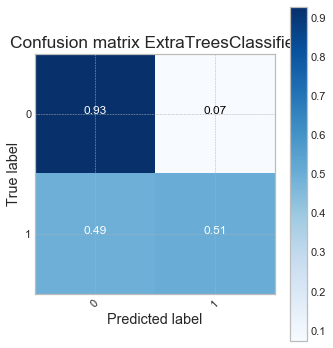

The Confusion Matrix of :  RandomForestClassifier
       0     1
0  87006  2403
1   2795  3014
Normalized confusion matrix
[[0.97 0.03]
 [0.48 0.52]]


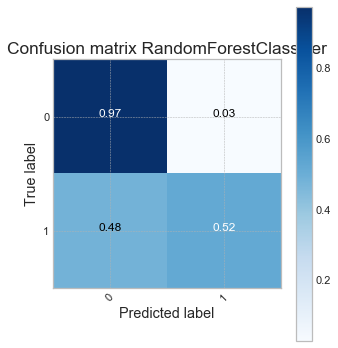

The Confusion Matrix of :  SVC
       0     1
0  86110  3299
1   2345  3464
Normalized confusion matrix
[[0.96 0.04]
 [0.4  0.6 ]]


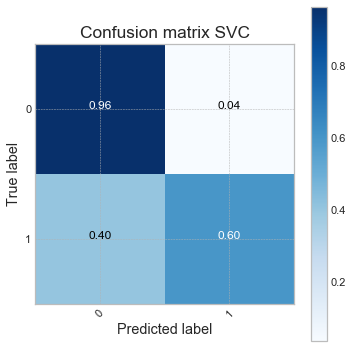

The Confusion Matrix of :  DecisionTreeClassifier
       0      1
0  66056  23353
1    691   5118
Normalized confusion matrix
[[0.74 0.26]
 [0.12 0.88]]


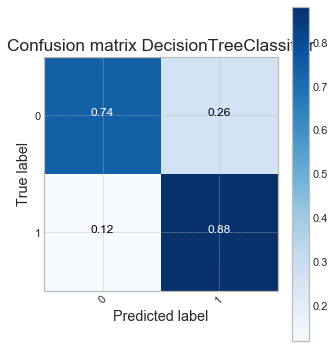

The Confusion Matrix of :  XGBClassifier
       0      1
0  63139  26270
1    536   5273
Normalized confusion matrix
[[0.71 0.29]
 [0.09 0.91]]


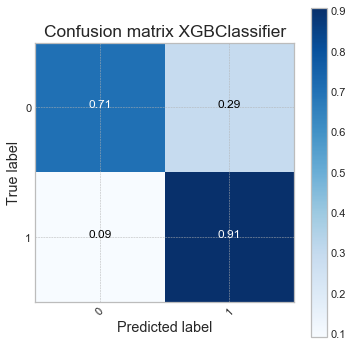

The Confusion Matrix of :  GaussianNB
       0      1
0  57270  32139
1    479   5330
Normalized confusion matrix
[[0.64 0.36]
 [0.08 0.92]]


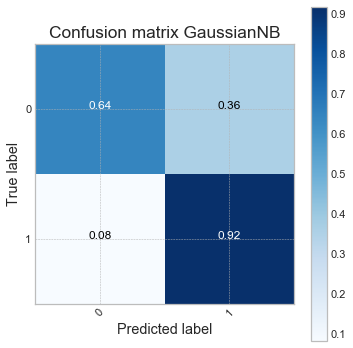

The Confusion Matrix of :  BaggingClassifier
       0     1
0  85033  4376
1   3765  2044
Normalized confusion matrix
[[0.95 0.05]
 [0.65 0.35]]


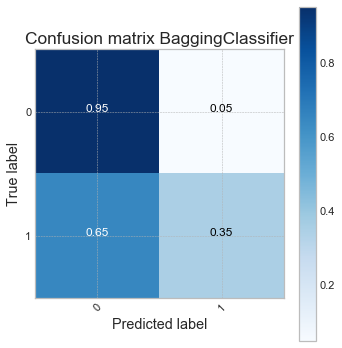

The Confusion Matrix of :  ExtraTreeClassifier
       0     1
0  87225  2184
1   4313  1496
Normalized confusion matrix
[[0.98 0.02]
 [0.74 0.26]]


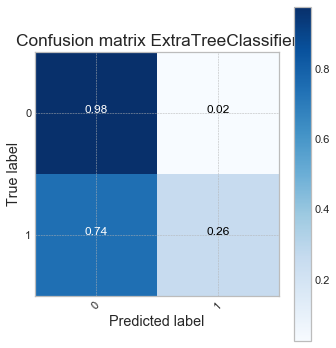

The Confusion Matrix of :  LinearDiscriminantAnalysis
       0     1
0  84593  4816
1   2904  2905
Normalized confusion matrix
[[0.95 0.05]
 [0.5  0.5 ]]


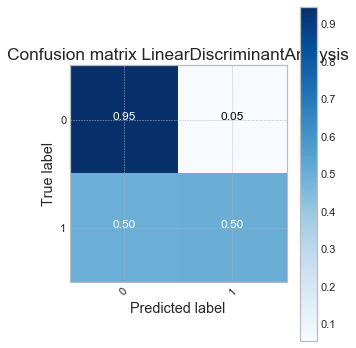

The Confusion Matrix of :  LogisticRegressionCV
       0     1
0  80256  9153
1   2815  2994
Normalized confusion matrix
[[0.9  0.1 ]
 [0.48 0.52]]


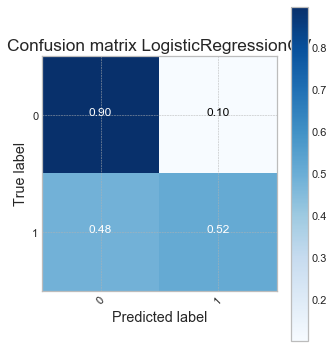

The Confusion Matrix of :  Perceptron
       0      1
0  73233  16176
1   1252   4557
Normalized confusion matrix
[[0.82 0.18]
 [0.22 0.78]]


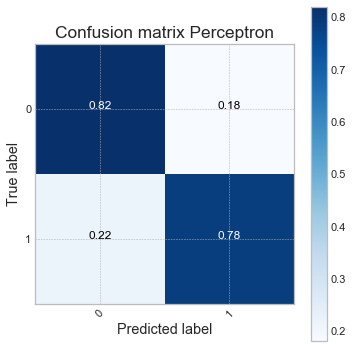

The Confusion Matrix of :  BernoulliNB
       0     1
0  83218  6191
1   1707  4102
Normalized confusion matrix
[[0.93 0.07]
 [0.29 0.71]]


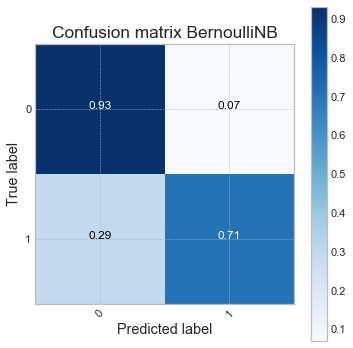

In [172]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", MLA_compare['MLA Name'].iloc[i])
    cnf_matrix = confusion_matrix(test_cinc[Target], pred)
    print (pd.DataFrame(cnf_matrix))
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True, title='Confusion matrix ' + MLA_compare['MLA Name'].iloc[i])
    plt.rcParams['figure.figsize'] = [5,5]
    plt.show()

### ROC curve

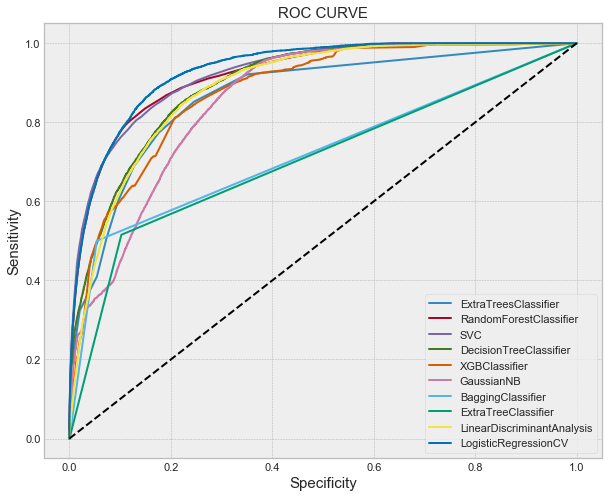

In [145]:
# ROC Curve for the classification models

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

#color = ['red', 'blue', 'green', 'fuchsia', 'cyan', ]
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(MLA) :
    try:
        prob = model.predict_proba(test_cinc[input_columns])
        prob_positive = prob[:,1]
        fpr, tpr, threshold = roc_curve(test_cinc[Target], prob_positive)
        plt.plot(fpr, tpr)
        plt.gca().legend(MLA_compare['MLA Name'], loc = 'lower right', frameon = True)
    except:
        continue
        
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

* Now I will train the best algorithm with 200000 cases (again, because of time and machine limitations) 

## Tuning Models - Hyper-Parameters

* Because of the time I have, I will just apply tuning to 2 models. I choose ExtraTrees because it has the best accuracy and I choose XGBClassifier because it has a great confusion matrix.

In [191]:
MLA_bests = [
    ensemble.ExtraTreesClassifier(),
    XGBClassifier()
]

param = [
    { # ensemble.ExtraTreesClassifier()
                #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
                'n_estimators': [10, 50,100,300],
                'criterion':  ['gini', 'entropy'],
                'max_depth': [2,4,6,None],
                'min_samples_split': [5,10,.03,.05,.10],
                'min_samples_leaf': [5,10,.03,.05,.10],  
                'oob_score':  [True, False], 
                'random_state': [0]
    },
    { # XGBClassifier()
        #https://xgboost.readthedocs.io/en/latest/parameter.html
                'max_depth':[4,5,6],
                'min_child_weight':[4,5,6],
                'min_child_weight':[6,8,10,12],
                'subsample':[i/10.0 for i in range(6,10)],
                'colsample_bytree':[i/10.0 for i in range(6,10)],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    },
    
]

data_hp = SMOTE_data#.sample(n=50000)
save_params = []
for i in range(0, len(MLA_bests)):
    
    search = RandomizedSearchCV(MLA_bests[i], scoring = 'accuracy', cv=5,#scoring='average_precision' roc_auc
                                n_iter=5, param_distributions= param[i],
                                refit=True, n_jobs=-1)
    search.fit(data_hp[input_columns], data_hp[Target])
    save_params.append(search.best_params_)
    print(search.best_estimator_)
    # save the classifier
    with open('models/Tuned_'+ MLA_bests[i].__class__.__name__ +'.pkl', 'wb') as f:
        cPickle.dump(MLA_bests[i], f)    

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.05, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=8, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verb

* Training with the best parameters:

In [192]:
MLA_bests = [
    ensemble.ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.05, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=8, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)
]

data = SMOTE_data #SMOTE_data.sample(n=50000, random_state = 1)

MLA_compare_bests = pd.DataFrame(columns = ['MLA Name', 'MLA Parameters', 'Test F1 Score', 'Test accuracy'])
MLA_predict_bests = {}
MLA_predict_bests["True Labels"] = data[Target].copy(deep=True) 

list_pred_bests = []

row_index = 0
for alg in MLA_bests:
    print(alg.__class__.__name__)
    MLA_compare_bests.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare_bests.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    model = alg.fit(data[input_columns], data[Target])
    list_pred_bests.append(model.predict(test_cinc[input_columns]))
    MLA_compare_bests.loc[row_index, 'Test accuracy'] = accuracy_score(test_cinc[Target], list_pred_bests[-1])
    MLA_compare_bests.loc[row_index, 'Test F1 Score'] = f1_score(test_cinc[Target], list_pred_bests[-1], average = 'binary')
    
    #with open('models/' + alg.__class__.__name__ + '.pkl', 'wb') as f:
    #    cPickle.dump(alg, f)    
    
    row_index+=1
MLA_compare_bests.sort_values(by = ['Test accuracy'], ascending = False, inplace = True)

ExtraTreesClassifier
XGBClassifier


In [183]:
for alg in MLA:
    with open('models/tuned_' + alg.__class__.__name__ + '.pkl', 'wb') as f:
        cPickle.dump(alg, f)  

### Accuracy

* Now, the Extra Trees classifier has less accuracy but a better confusion matrix. Because my train data has balanced classes, this one had a better performance before but with a very bad confusion matrix.

In [193]:
#plots ['MLA Name', 'MLA Parameters', 'Test F1 Score', 'Test accuracy']
MLA_compare_bests

,MLA Name,MLA Parameters,Test F1 Score,Test accuracy
1,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.524652,0.922641
0,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.272101,0.700624


### Precision | Recall 

In [196]:
for i, predictions in enumerate(list_pred_bests) :
    print ("Classification Report of ", MLA_compare_bests['MLA Name'].iloc[i])
    print (classification_report(test_cinc[Target], predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  XGBClassifier
              precision    recall  f1-score   support

       <=50K       0.99      0.69      0.81     89409
        >50K       0.16      0.92      0.27      5809

    accuracy                           0.70     95218
   macro avg       0.58      0.80      0.54     95218
weighted avg       0.94      0.70      0.78     95218

Classification Report of  ExtraTreesClassifier
              precision    recall  f1-score   support

       <=50K       0.98      0.94      0.96     89409
        >50K       0.42      0.70      0.52      5809

    accuracy                           0.92     95218
   macro avg       0.70      0.82      0.74     95218
weighted avg       0.95      0.92      0.93     95218



### Confusion Matrix

The Confusion Matrix of :  XGBClassifier
       0      1
0  61384  28025
1    481   5328
Normalized confusion matrix
[[0.69 0.31]
 [0.08 0.92]]


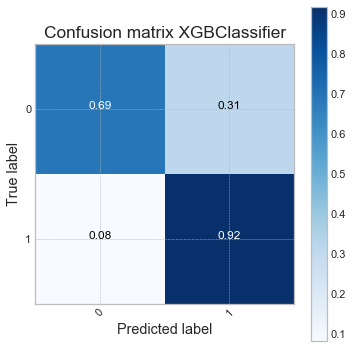

The Confusion Matrix of :  ExtraTreesClassifier
       0     1
0  83787  5622
1   1744  4065
Normalized confusion matrix
[[0.94 0.06]
 [0.3  0.7 ]]


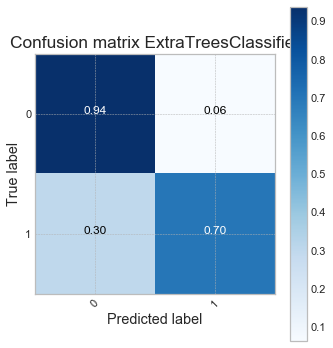

In [197]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
for i, pred in enumerate(list_pred_bests) :
    print ("The Confusion Matrix of : ", MLA_compare_bests['MLA Name'].iloc[i])
    cnf_matrix = confusion_matrix(test_cinc[Target], pred)
    print (pd.DataFrame(cnf_matrix))
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True, title='Confusion matrix ' + MLA_compare_bests['MLA Name'].iloc[i])
    plt.rcParams['figure.figsize'] = [5,5]
    plt.show()
    


### ROC curve

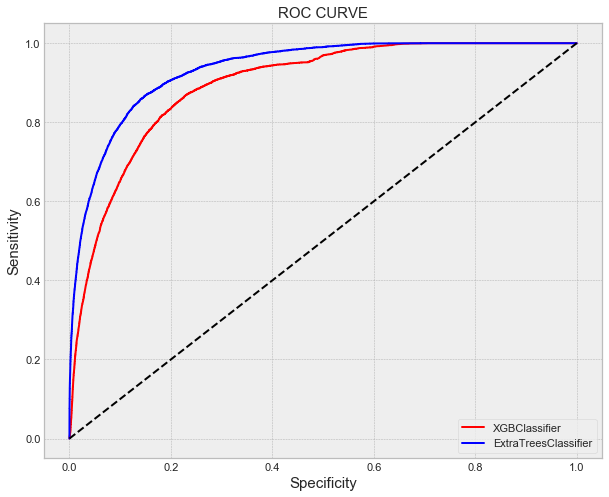

In [198]:
# ROC Curve for the classification models

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(MLA_bests) :
    prob = model.predict_proba(test_cinc[input_columns])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(test_cinc[Target], prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(MLA_compare_bests['MLA Name'], loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

# Conclusions and future work

* It’s obvious that features like age, education, sex, country of birth, race, capital gains, capital losses and dividends from stocks are very related to the income, as it can be seen in this project.

* In this project, it is important to have good accuracy for both classes. As the test dataset has more lines for one of the classes, if the accuracy of this class is optimal, the algorithm will perform well in this data, just like the first extra tree algorithm (95% general accuracy but about 50% of accuracy for the least represented class). So, I prefer an algorithm like XBGClassifier with 92.3% accuracy but with good accuracy for both classes.

* The dataset that I trained with was balanced with SMOTE.